# Sumário

1. Objetivo

2. Contextualização

    1.1 Estimando $\beta_{0}$ e $\beta_{1}$ pelo Métodos dos Mínimos Quadrados
    
2. Aplicação em Python

# 1. Objetivo

O objetivo deste notebook é encontrar os parâmetros $\beta_{0}$ e $\beta_{1}$ que minimizam a soma quadrática dos resíduos (RSS) em um modelo de regressão linear simples e visualizar estes parâmetros graficamente.

# 2. Contextualização

Vamos supor duas variáveis $X$ (features) e $Y$ (targets), que assumem uma relação linear entre si, dada por:

\begin{equation}
    Y = \beta_{0} + \beta_{1}X
\end{equation}

$\beta_{0}$ e $\beta_{1}$ são parâmetros desconhecidos do modelo. Assumindo que $\hat{\beta_{0}}$ e $\hat{\beta_{1}}$ são os parâmetros estimados pelo modelo, podemos fazer previsões da variável $Y$ (que vamos chamar de $\hat{Y}$), a partir da seguinte equação:

\begin{equation}
    \hat{Y} = \hat{\beta_{0}} + \hat{\beta_{1}}X
\end{equation}

### 1.1 Estimando $\beta_{0}$ e $\beta_{1}$ pelo Método dos mínimos quadrados

Para estimar os parâmetros $\beta_{0}$ e $\beta_{1}$, vamos utilizar o nosso conjunto de dados, que aqui vamos denotar por $(x_{1}, y_{1}), (x_{2}, y_{2}), ... , (x_{n}, y_{n})$. Há várias maneiras de encontrar $\beta_{0}$ e $\beta_{1}$ no qual o ajuste mais se aproxime do conjunto de dados, mas o método mais utilizado é o de <b><u>mínimos quadrados</u></b>.

Vamos considerar que a predição de $y$ em função de $x$ seja dada por

\begin{equation}
    \hat{y_{i}} = \hat{\beta_{0}} + \hat{\beta_{1}}x_{i} \tag{1}
\end{equation}

Então podemos definir os resíduos (diferença entre o valor real de $y$ e o valor previsto pelo modelo) como

\begin{equation}
    e_{i} = y_{i} - \hat{y_{i}} \tag{2}
\end{equation}

Definimos também a soma quadrática dos resíduos (RSS) como

\begin{equation}
    RSS = e_{1}^{2} + e_{2}^{2} + ... + e_{n}^{2} \tag{3}
\end{equation}

Como $e_{i} = y_{i} - \hat{y_{i}}$ e $\hat{y_{i}} = \hat{\beta_{0}} + \hat{\beta_{1}}x_{i}$, então

\begin{equation}
    RSS = (y_{1} - \hat{\beta_{0}} - \hat{\beta_{1}}x_{1})^{2} + (y_{2} - \hat{\beta_{0}} - \hat{\beta_{1}}x_{2})^{2} + ... + (y_{n} - \hat{\beta_{0}} - \hat{\beta_{1}}x_{n})^{2} \tag{4}
\end{equation}

O métodos dos mínimos quadrados tem como objetivo minimizar o $RSS$. Para isso, precisamos  derivar a equação (4) com relação a $\beta_{0}$ e $\beta_{1}$ e igualar a zero. Realizando esta operação, obtemos os parâmetros que minimizam o $RSS$, que são dados por:

\begin{equation}
    \hat{\beta_{0}} = \bar{y} - \hat{\beta_{1}}\bar{x} \tag{5}
\end{equation}

e

\begin{equation}
    \hat{\beta_{1}} = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})(y_{i} - \bar{y})}{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}} \tag{6}
\end{equation}

sendo, 

$\bar{y} = \frac{1}{n}\sum_{i=1}^{n}y_{i}$ e $\bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_{i}$

De forma mais simples, o que encontramos foi o coeficiente angular ($\hat{\beta_{1}}$) e linear ($\hat{\beta_{0}}$) que minimiza o $RSS$.

# Aplicação em Python

In [65]:
# import das bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Passo 1) Criando dados de entrada com dependência linear

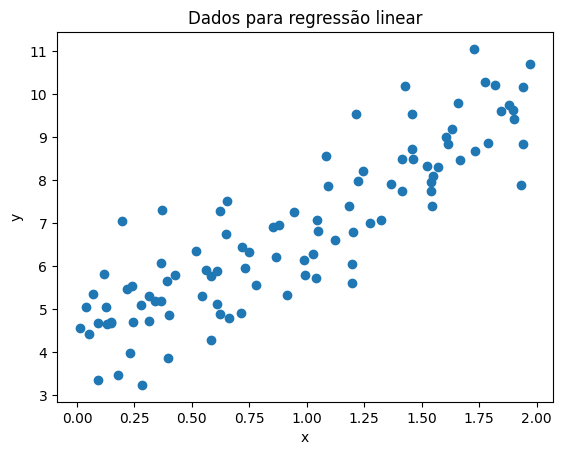

In [67]:
# semente para reprodutibilidade
np.random.seed(42)

# array de features
X = np.random.rand(100, 1)*2

# array de targets
y = 3*X + 4 + np.random.randn(100,1)

plt.scatter(X,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dados para regressão linear')
plt.show()

## 2) Estimando $\beta_{0}$ e $\beta_{1}$ a partir dos dados

Para isso, utilizamos as equações (5) e (6)

In [68]:
beta1 = (np.sum((X - np.mean(X)) * (y - np.mean(y))))/(np.sum((X - np.mean(X))**(2)))

beta0 = np.mean(y) - beta1 * np.mean(X)

In [69]:
print(beta0)
print(beta1)

4.215096157546746
2.770113386438484


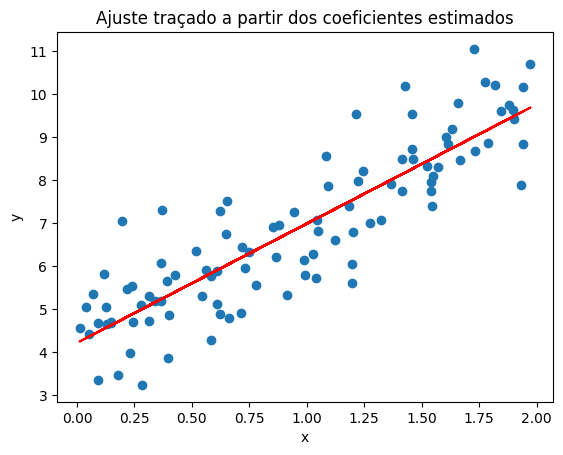

In [85]:
# plot da reta obtida a partir dos coeficientes estimados (y_pred = beta0 + beta1*X)
y_pred = beta0 + beta1*X

plt.scatter(X,y)
plt.plot(X, y_pred, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste traçado a partir dos coeficientes estimados')
plt.show()

In [86]:
# função para cálculo do RSS (RSS = e1^2 + e2^2 + ... + en^2), conforme equação (4)
def rss(X, y, beta0, beta1):
    y_pred = beta0 + beta1*X
    residuos = y  -y_pred
    return np.sum(residuos**(2))

## 3) Gráfico do RSS em função de $\beta_{1}$

Para construir este gráfico, vamos manter $\beta_{0}$ fixo e variar $\beta_{1}$

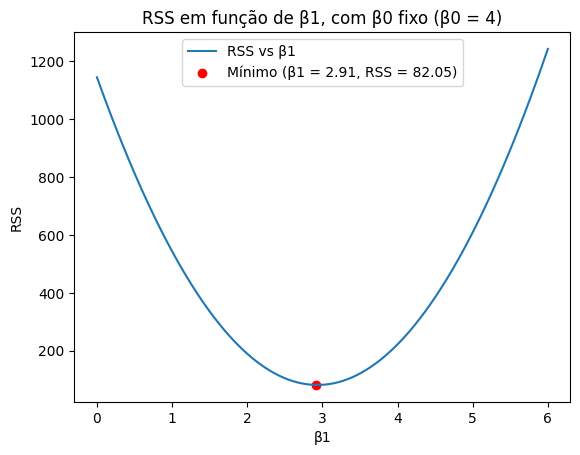

In [89]:
# escolha feita a partir do gráfico construído com os coeficientes estimados
beta0_fixo = 4

# range de valores de beta1 entre 0 e 6, igualmente espaçados
range_beta1 = np.linspace(0, 6, 100)

# calculo do RSS para range_beta1
range_rss = [rss(X, y, beta0_fixo, beta1) for beta1 in range_beta1]

# plot de RSS em função de beta1
plt.plot(range_beta1, range_rss, label='RSS vs β1')
plt.xlabel('β1')
plt.ylabel('RSS')
plt.title(f'RSS em função de β1, com β0 fixo (β0 = {beta0_fixo})')

# valor mínimo de RSS e o valor de beta1 correspondente
min_rss = np.min(range_rss)
beta1_min = range_beta1[np.argmin(range_rss)]

# Destacando o ponto mínimo no gráfico
plt.scatter(beta1_min, min_rss, color='red', label=f'Mínimo (β1 = {beta1_min:.2f}, RSS = {min_rss:.2f})')
plt.legend()
plt.show()

A partir do gráfico acima, percebe-se que, escolhendo um β0 = 4, obtém-se um valor de β1 = 2.91 que minimiza a função RSS.